# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import square, sqrt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#Team 12
#Designed by:
#   Richard A. Bravo
#   Evan Adams
#   Julian Itwaru

print("Input .csv file name.")
print("Leave blank for original dataset.")
input_file = input()
if input_file == "":
    input_file = "Nutrition.csv"    

df = pd.read_csv(input_file)
df.head()

Input .csv file name.
Leave blank for original dataset.
xclara.csv


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


# Gather Data

In [2]:
x = []
y = []

if(input_file == "Nutrition.csv"):
    # forced to iterate through the dataframe myself
    for index, row in df.iterrows():
        if((row['Data_Value_Footnote_Symbol'] != '~') and (row['Total'] == 'Total')):
            if(row['QuestionID'] == 'Q039'):
                x.append(row['Data_Value'])
            if(row['QuestionID'] == 'Q049'):
                y.append(row['Data_Value'])

        # if I didn't find both I just delete the last overweight questions
        # every year has overweight answered, other questions aren't as complete
        if(len(x) > len(y)):
            del x[-1]

    # double check the number of answers collected
    if(len(x) == len(y)):
        print("Datasets are the correct length. Congratulations")
        print(len(x), len(y))
    else:
        print("Datasets are incorrect length. Error incoming")
        print(len(x), len(y)) 
else:
    x = df.ix[:,0].tolist()
    y = df.ix[:,1].tolist()
    
# Initialize set of feature vectors
print("\nSample of feature vector points:")
points = list(zip(x, y))
points[:5]


Sample of feature vector points:


/home/richard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[(2.072345, -3.241693),
 (17.93671, 15.78481),
 (1.083576, 7.319176),
 (11.12067, 14.40678),
 (23.71155, 2.557729)]

# Intial Graph
Data gathered roughly every two years from all states across 2001-2015.

Not every study has complete data so I just accepted from states/year with both questions available.

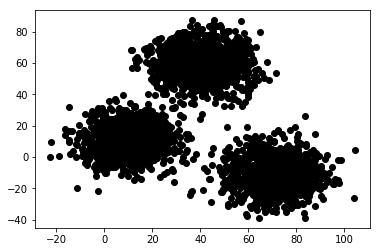

In [3]:
plt.scatter(x, y, c='black')
plt.show()

# K-means
Functions used.

In [4]:
# Checks to see if there is a vector that changes it's cluster affiliation
def change_check(old_clusters, updated_clusters, difference):
    change = False
    for i in range(num_clusters):
            d = sim_function(old_clusters[i][0], old_clusters[i][1], updated_clusters[i][0], updated_clusters[i][1])
            if(d > difference):
                change = True

    return change

# Returns an updated cluster array
# (newx, newy) = sum of associated vectors(x,y)
def cluster_update(vectors = [(0, 0)], associations = []):
    # Updated array of clusters based on points and their assignment
    xArray = [0.0] * num_clusters
    yArray = [0.0] * num_clusters
    numArray = [0] * num_clusters
    for i in range(len(vectors)):
        clust_index = associations[i] - 1
        xArray[clust_index] += vectors[i][0]
        yArray[clust_index] += vectors[i][1]
        numArray[clust_index] += 1

    for i in range(len(numArray)):
        xArray[i] /= numArray[i]
        yArray[i] /= numArray[i]

    uArray = zip(xArray, yArray)
    return list(uArray)


# Finds for each vector, it's closest cluster
# Returns a list of Associated clusters (1 to num_cluster)
def cluster_location(vectors = [(0, 0)], cluster_vectors = [(0, 0)]):
    A = []  #
    d = []  # temp array
    for i in range(len(vectors)):
        for j in range(len(cluster_vectors)):
            d.insert(j, sim_function(vectors[i][0], vectors[i][1], cluster_vectors[j][0], cluster_vectors[j][1]))

        # inserts which cluster alligns with which vector
        A.insert(i, np.argmin(d) + 1)
        d.clear()

    return A

# Calculates distance between vector and cluster
# Uses Manhatten Distance
def sim_function(x1 = 0, y1 = 0, x2 = 0, y2 = 0):
    return abs(x2 - x1) + abs(y2 - y1)

Plotting the Graph

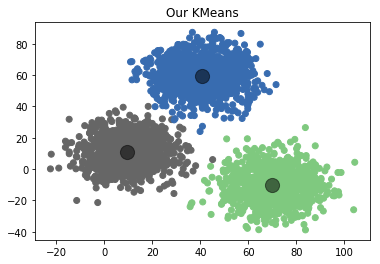

In [5]:
# number of clusters you want
num_clusters = 3

# acceptable difference between clusters
tolerance = .0001

# set of associated clusters for each feature vector
vector_cluster = []

# vectors for the clusters
clusters = []

# Initializes clusters by choosing random vectors
tempPoints = points[:]
for i in range(num_clusters):
    j = np.random.randint(0, len(tempPoints) - 1)
    clusters.insert(i, tempPoints[j])
    del tempPoints[j]

val = True
while(val):
    vector_associations = cluster_location(points, clusters)
    new_clusters = cluster_update(points, vector_associations)
    val = change_check(clusters, new_clusters, tolerance)
    clusters = new_clusters
    
#plt.xlabel('% of students who are overweight')
#plt.ylabel('% of students who participate in daily physical education')
plt.title('Our KMeans')
points_x = [i[0] for i in points]
points_y = [i[1] for i in points]
clusters_x = [i[0] for i in clusters]
clusters_y = [i[1] for i in clusters]

plt.scatter(points_x, points_y, c=vector_associations, cmap='Accent')
plt.scatter(clusters_x, clusters_y, c='black', s=200, alpha=0.5)
plt.show()

# Kmeans with Sklearn

Now we can check our results with pythons sklearn function for k-means. I tried to make the parameters similar to the ones I used in my implementation.

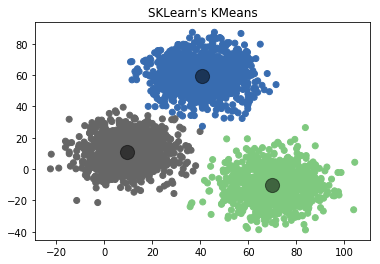

In [6]:
kmeans = KMeans(n_clusters=num_clusters, init='random', precompute_distances=False, tol=tolerance).fit(points)
y_kmeans = kmeans.predict(points)
plt.scatter(points_x, points_y, c=y_kmeans, cmap='Accent')
centers = kmeans.cluster_centers_
#plt.xlabel('% of students who are overweight')
#plt.ylabel('% of students who participate in daily physical education')
plt.title('SKLearn\'s KMeans')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

# DBSCAN

Function Implementation.

In [7]:
#-------------------------------
#OurDBSCAN Function
#-------------------------------   
def OurDBSCAN(Dataset, eps, MinPts):
    noise = [] #Variable to hold noise points
    visited = [] #List to hold points that have been visited
    not_visited = [] #The points that have not been visited
    Clusters = [] #List to hold all the clusters
    total = 0 #A test to see if all points were visited
    
    
    for i in Dataset:
        not_visited.append(i)
           
    for point in Dataset:
        if point in visited:
            continue
        visited.append(point)
        neighbour_points = NeighbourPoints(Dataset,point,eps)
        if len(neighbour_points) < MinPts:
            noise.append(point)
            continue
        else:
            Clusters,visited,not_visited,noise = expandCluster(Dataset, point, visited, not_visited, noise, Clusters, neighbour_points, eps, MinPts)
            

    for cluster in Clusters:
        total += len(cluster)
        plt.scatter([i[0] for i in cluster],[i[1] for i in cluster],cmap="prism")
    

    
    #Add noise points, noise points are in black   
    total += len(noise)
    plt.scatter([i[0] for i in noise],[i[1] for i in noise],color = "black")
    plt.title("Our DBSCAN")
    plt.show()
    
    
#-------------------------------
#NeigbourPoints Function
#Documentation: none, part of DBSCAN function
#-------------------------------       
def expandCluster(Dataset, Point, visited, not_visited, noise, Clusters, neighbour_points, eps, MinPts):
    temp_Cluster = []
    #temp_Cluster.append(Point)
    #not_visited.remove(Point)
    for neighbour_point in neighbour_points:
        if neighbour_point in noise:
            #Remove point from noise
            noise.remove(neighbour_point)
            
            #Will check to see if point is already ina cluster
            in_cluster = 0
            for clust in Clusters:
                if neighbour_point in clust:
                    in_cluster = 1
                    break
            if in_cluster != 1:
                temp_Cluster.append(neighbour_point)
                
        if neighbour_point in not_visited:
            visited.append(neighbour_point)
            not_visited.remove(neighbour_point)
            next_neighbour_points = NeighbourPoints(Dataset,neighbour_point,MinPts)
            if len(next_neighbour_points) >= MinPts:
                for i in next_neighbour_points:
                    neighbour_points.append(i)

            in_cluster = 0
            for clust in Clusters:
                if neighbour_point in clust:
                    in_cluster = 1
                    break
            if in_cluster != 1:
                temp_Cluster.append(neighbour_point)
                

            
    Clusters.append(temp_Cluster)       
    return Clusters, visited, not_visited, noise       
    
    
    
    
#-------------------------------
#NeigbourPoints Function
#Documentation: none, part of DBSCAN function
#-------------------------------
def NeighbourPoints(Dataset,Point,eps):
    neighbour_points = []  #Variable to hold all neighbour points of core point
    
    #neighbour_points.append(Point)
    #Go through all the points
    for vec in Dataset:
        
        #Use euclidean distance formula to check distance between points
        distance = sqrt(((Point[0]-vec[0])**2)+((Point[1]-vec[1])**2))
        
        #if less then or equal to eps, then point is a neighbour
        if distance <= eps:
            neighbour_points.append(vec)
    
    #return the list of neighbour points
    return neighbour_points

Plotting the graph

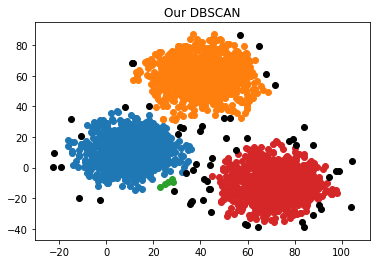

In [8]:
OurDBSCAN(points, 4, 4)

# DBSCAN with SKLearn

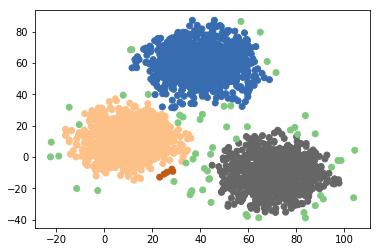

In [9]:
db = DBSCAN(eps = 4 , min_samples = 4 , metric='euclidean').fit(points)
core_samples = db.core_sample_indices_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plt.scatter(points_x, points_y, c=labels, cmap='Accent')
plt.show()

# ANGES

Function Implementation

In [10]:
def inter_cluster_distance(cluster1, cluster2):
    mindist = np.iinfo(np.int64).max
    for datapoint in cluster1:
        for datapoint2 in cluster2:
            d = distance(datapoint, datapoint2)
            if d < mindist:
                mindist = d
    return mindist


def distance(X, Y):
    s = 0
    for x, y in zip(X, Y):
        s += (x-y)**2
    return np.sqrt(s)


def init_clusters(data):
    clusterN = []
    i = 0
    for (x, y) in data:
        cluster = [x,y]
        clusterN.append([cluster,])
        i += 1
    return clusterN


def get_min_dist_clusters(clusters):
    #if the distance is < 1 pair
    
    # default the min distance to the first pair
    x = clusters[1]
    y = clusters[0]
    i = 1
    pairs = (x,y)
    min_pair = (1, 0)
    min_dist = inter_cluster_distance(x, y)
    for i, pair1 in enumerate(clusters):
        for j, pair2 in enumerate(clusters[:i]):
            d = inter_cluster_distance(pair1, pair2)
            if d < min_dist:
                min_dist = d
                min_pair = (i, j)
                
    return min_pair


def tmap(data, n):
    clusters = init_clusters(data)
    while len(clusters) > n:
        left, right = get_min_dist_clusters(clusters)
        l, r = clusters[left], clusters[right]
        clusters = clusters[:right] + clusters[right+1:left] + clusters[left+1:]
        
        newcluster = l + r 
        clusters.append(newcluster)
    return clusters

Running AGNES

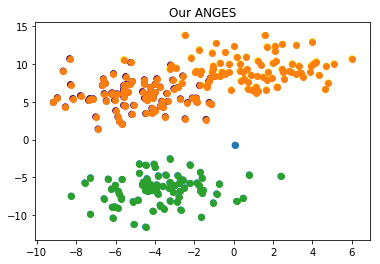

In [11]:
data = [list(elem) for elem in points]
clusters = init_clusters(data)
blobs, labels = make_blobs(250, cluster_std=2)
x, y = [i[0] for i in blobs], [i[1] for i in blobs]
plt.scatter(x, y, c=labels)
clusters = tmap(blobs, 3)
for c, cluster in enumerate(clusters):
    x, y = [i[0] for i in cluster], [i[1] for i in cluster]
    plt.scatter(x, y)
plt.title('Our ANGES')
plt.show()

# AGNES with SKLearn

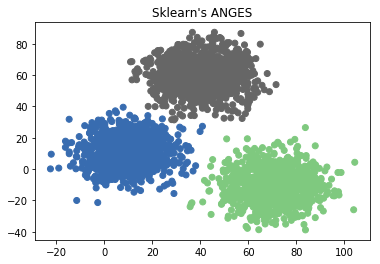

In [12]:
AGNES = AgglomerativeClustering(n_clusters=num_clusters, linkage='complete').fit(points)
plt.scatter(points_x, points_y, c=AGNES.labels_, cmap='Accent')
plt.title('Sklearn\'s ANGES')
plt.show()